In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
open = pd.read_csv('email_opened_table.csv')
email = pd.read_csv('email_table.csv')
click = pd.read_csv('link_clicked_table.csv')

In [3]:
open

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034
...,...
10340,990213
10341,918210
10342,200299
10343,211104


In [4]:
open['opened'] = 1
open

,email_id,opened
0,284534,1
1,609056,1
2,220820,1
3,905936,1
4,164034,1
...,...,...
10340,990213,1
10341,918210,1
10342,200299,1
10343,211104,1


In [5]:
click

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561
...,...
2114,873162
2115,435454
2116,206772
2117,742967


In [6]:
click['clicked'] = 1
click

,email_id,clicked
0,609056,1
1,870980,1
2,935124,1
3,158501,1
4,177561,1
...,...,...
2114,873162,1
2115,435454,1
2116,206772,1
2117,742967,1


In [7]:
df = pd.merge(open, click, on='email_id', how='outer')

In [8]:
new_df = pd.merge(df, email, on='email_id', how='outer')
new_df

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,284534,1.0,1.0,short_email,personalized,7,Monday,US,6
1,609056,1.0,1.0,short_email,personalized,2,Thursday,US,6
2,220820,1.0,1.0,short_email,personalized,8,Monday,UK,4
3,905936,1.0,1.0,short_email,generic,14,Saturday,UK,3
4,164034,1.0,1.0,long_email,personalized,2,Thursday,US,11
...,...,...,...,...,...,...,...,...,...
99995,506337,NaN,NaN,short_email,generic,8,Wednesday,FR,2
99996,803504,NaN,NaN,short_email,personalized,4,Monday,US,5
99997,899722,NaN,NaN,long_email,personalized,7,Saturday,US,1
99998,449610,NaN,NaN,long_email,personalized,11,Saturday,UK,6


In [9]:
new_df.sample(10)

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases
71554,766334,NaN,NaN,long_email,generic,10,Tuesday,UK,11
14845,938782,NaN,NaN,long_email,personalized,4,Monday,UK,4
6714,848951,1.0,NaN,long_email,personalized,6,Saturday,UK,3
65474,316886,NaN,NaN,long_email,generic,6,Saturday,UK,1
49131,918105,NaN,NaN,short_email,personalized,19,Saturday,UK,0
99820,897445,NaN,NaN,long_email,generic,9,Monday,US,2
31090,820807,NaN,NaN,long_email,personalized,5,Monday,UK,6
54106,352654,NaN,NaN,long_email,generic,6,Saturday,US,6
84521,725597,NaN,NaN,short_email,generic,9,Monday,US,1
88623,521251,NaN,NaN,short_email,personalized,2,Sunday,FR,4


In [10]:
new_df.to_csv('email_analysis.csv', index=False)

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   email_id             100000 non-null  int64  
 1   opened               10345 non-null   float64
 2   clicked              2119 non-null    float64
 3   email_text           100000 non-null  object 
 4   email_version        100000 non-null  object 
 5   hour                 100000 non-null  int64  
 6   weekday              100000 non-null  object 
 7   user_country         100000 non-null  object 
 8   user_past_purchases  100000 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [11]:
new_df['opened'] = new_df['opened'].fillna(0).astype(int)
new_df['clicked'] = new_df['clicked'].fillna(0).astype(int)

In [12]:
new_df

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,284534,1,1,short_email,personalized,7,Monday,US,6
1,609056,1,1,short_email,personalized,2,Thursday,US,6
2,220820,1,1,short_email,personalized,8,Monday,UK,4
3,905936,1,1,short_email,generic,14,Saturday,UK,3
4,164034,1,1,long_email,personalized,2,Thursday,US,11
...,...,...,...,...,...,...,...,...,...
99995,506337,0,0,short_email,generic,8,Wednesday,FR,2
99996,803504,0,0,short_email,personalized,4,Monday,US,5
99997,899722,0,0,long_email,personalized,7,Saturday,US,1
99998,449610,0,0,long_email,personalized,11,Saturday,UK,6


In [13]:
new_df.info

<bound method DataFrame.info of        email_id  opened  clicked   email_text email_version  hour    weekday  \
0        284534       1        1  short_email  personalized     7     Monday   
1        609056       1        1  short_email  personalized     2   Thursday   
2        220820       1        1  short_email  personalized     8     Monday   
3        905936       1        1  short_email       generic    14   Saturday   
4        164034       1        1   long_email  personalized     2   Thursday   
...         ...     ...      ...          ...           ...   ...        ...   
99995    506337       0        0  short_email       generic     8  Wednesday   
99996    803504       0        0  short_email  personalized     4     Monday   
99997    899722       0        0   long_email  personalized     7   Saturday   
99998    449610       0        0   long_email  personalized    11   Saturday   
99999     72497       0        0  short_email       generic    10     Monday   

      u

In [14]:
def get_engagement_status(row):
    if row['clicked'] == 1 and row['opened'] == 1:
        return "Clicked and Opened"
    elif row['opened'] == 1 and row['clicked'] == 0:
        return "Opened but Not Clicked"
    elif row['opened'] == 0 and row['clicked'] == 0:
        return "Not Opened"
    else:
       
        return "Anomaly"

new_df['engagement_status'] = new_df.apply(get_engagement_status, axis=1)

print(new_df['engagement_status'].value_counts())
new_df.head()

engagement_status
Not Opened                89605
Opened but Not Clicked     8276
Clicked and Opened         2069
Anomaly                      50
Name: count, dtype: int64


,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases,engagement_status
0,284534,1,1,short_email,personalized,7,Monday,US,6,Clicked and Opened
1,609056,1,1,short_email,personalized,2,Thursday,US,6,Clicked and Opened
2,220820,1,1,short_email,personalized,8,Monday,UK,4,Clicked and Opened
3,905936,1,1,short_email,generic,14,Saturday,UK,3,Clicked and Opened
4,164034,1,1,long_email,personalized,2,Thursday,US,11,Clicked and Opened


In [15]:
new_df

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases,engagement_status
0,284534,1,1,short_email,personalized,7,Monday,US,6,Clicked and Opened
1,609056,1,1,short_email,personalized,2,Thursday,US,6,Clicked and Opened
2,220820,1,1,short_email,personalized,8,Monday,UK,4,Clicked and Opened
3,905936,1,1,short_email,generic,14,Saturday,UK,3,Clicked and Opened
4,164034,1,1,long_email,personalized,2,Thursday,US,11,Clicked and Opened
...,...,...,...,...,...,...,...,...,...,...
99995,506337,0,0,short_email,generic,8,Wednesday,FR,2,Not Opened
99996,803504,0,0,short_email,personalized,4,Monday,US,5,Not Opened
99997,899722,0,0,long_email,personalized,7,Saturday,US,1,Not Opened
99998,449610,0,0,long_email,personalized,11,Saturday,UK,6,Not Opened


In [16]:
new_df

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases,engagement_status
0,284534,1,1,short_email,personalized,7,Monday,US,6,Clicked and Opened
1,609056,1,1,short_email,personalized,2,Thursday,US,6,Clicked and Opened
2,220820,1,1,short_email,personalized,8,Monday,UK,4,Clicked and Opened
3,905936,1,1,short_email,generic,14,Saturday,UK,3,Clicked and Opened
4,164034,1,1,long_email,personalized,2,Thursday,US,11,Clicked and Opened
...,...,...,...,...,...,...,...,...,...,...
99995,506337,0,0,short_email,generic,8,Wednesday,FR,2,Not Opened
99996,803504,0,0,short_email,personalized,4,Monday,US,5,Not Opened
99997,899722,0,0,long_email,personalized,7,Saturday,US,1,Not Opened
99998,449610,0,0,long_email,personalized,11,Saturday,UK,6,Not Opened


In [17]:
anomaly = new_df['engagement_status'] == 'Anomaly'
new_df = new_df[~anomaly]

In [18]:
(new_df['engagement_status'] == 'Anomaly').sum()

0

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99950 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   email_id             99950 non-null  int64 
 1   opened               99950 non-null  int32 
 2   clicked              99950 non-null  int32 
 3   email_text           99950 non-null  object
 4   email_version        99950 non-null  object
 5   hour                 99950 non-null  int64 
 6   weekday              99950 non-null  object
 7   user_country         99950 non-null  object
 8   user_past_purchases  99950 non-null  int64 
 9   engagement_status    99950 non-null  object
dtypes: int32(2), int64(3), object(5)
memory usage: 7.6+ MB


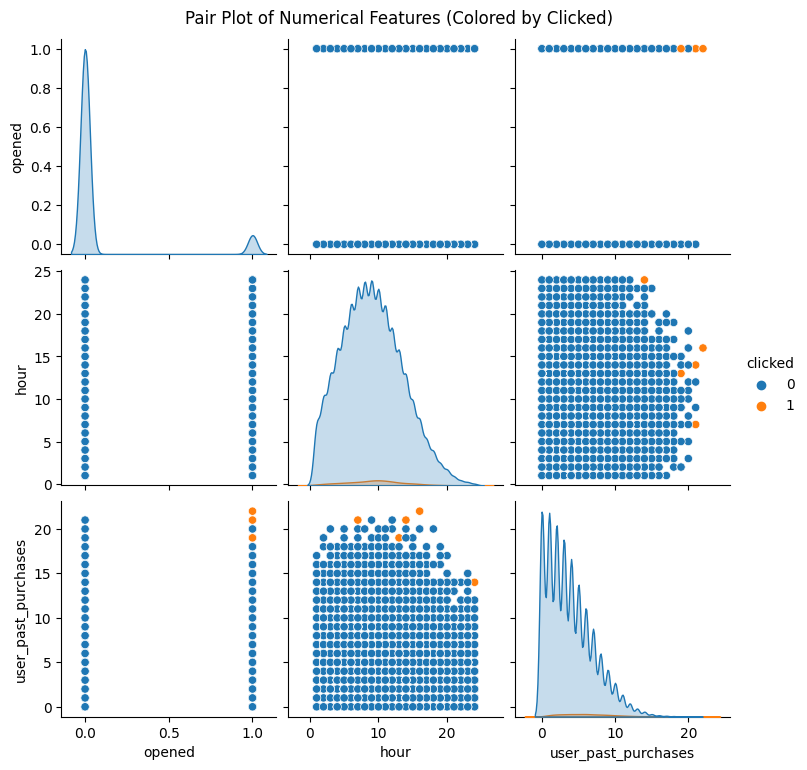

In [20]:
num_col = ['opened', 'clicked', 'hour', 'user_past_purchases' ]
sns.pairplot(new_df[num_col], hue='clicked', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features (Colored by Clicked)', y=1.02)
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_19464\916174369.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=new_df, x='user_past_purchases', y='clicked', ci=None, palette='viridis')


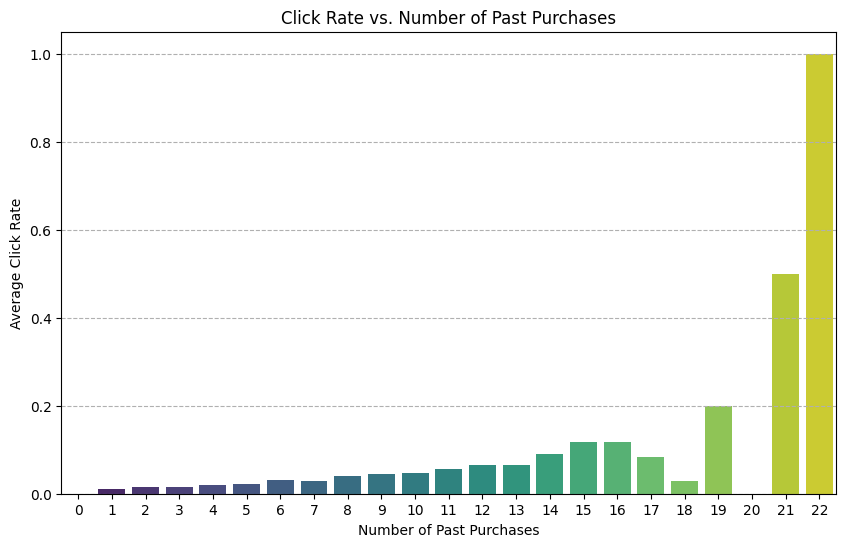

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=new_df, x='user_past_purchases', y='clicked', ci=None, palette='viridis')
plt.title('Click Rate vs. Number of Past Purchases')
plt.xlabel('Number of Past Purchases')
plt.ylabel('Average Click Rate')
plt.grid(axis='y', linestyle='--')

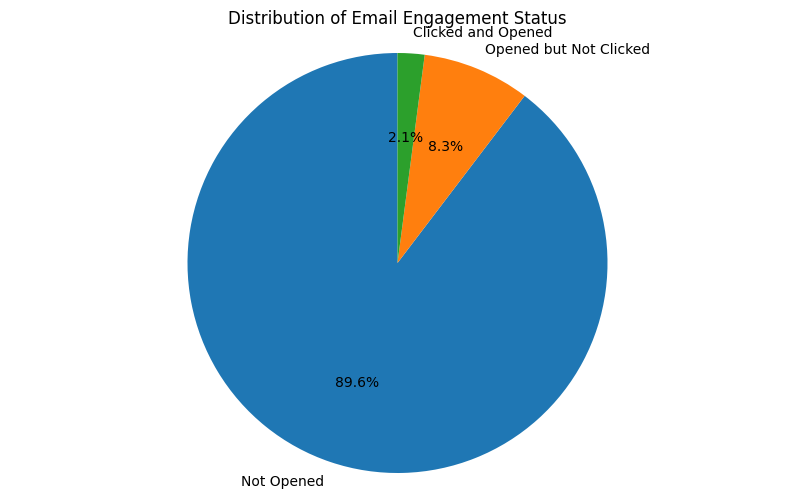

In [22]:
plt.figure(figsize=(10, 6))
engagement_counts = new_df['engagement_status'].value_counts()
plt.pie(engagement_counts.values, labels=engagement_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Email Engagement Status')
plt.axis('equal')
plt.show()


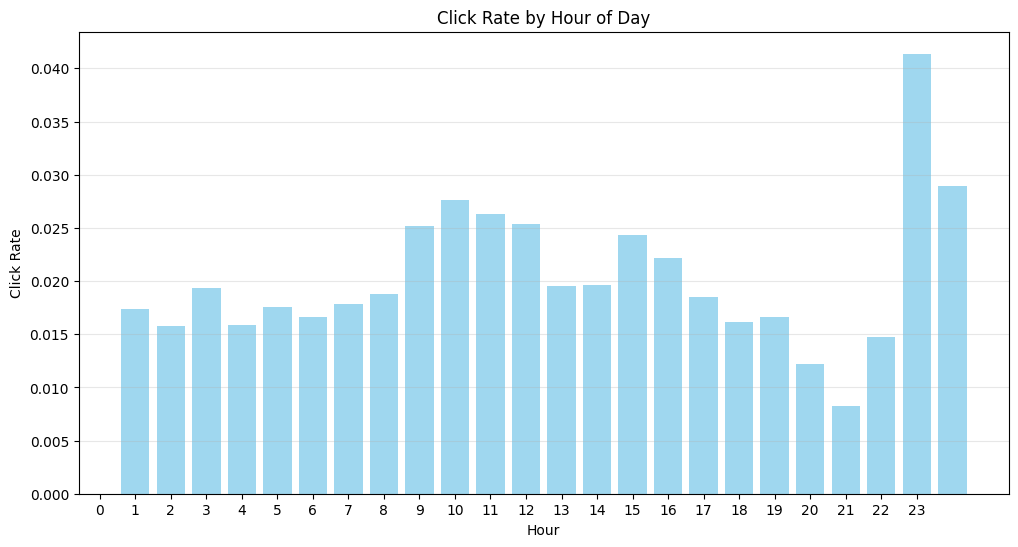

In [23]:
plt.figure(figsize=(12, 6))
hourly_click_rate = new_df.groupby('hour')['clicked'].mean()
plt.bar(hourly_click_rate.index, hourly_click_rate.values, color='skyblue', alpha=0.8)
plt.title('Click Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Click Rate')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.show()


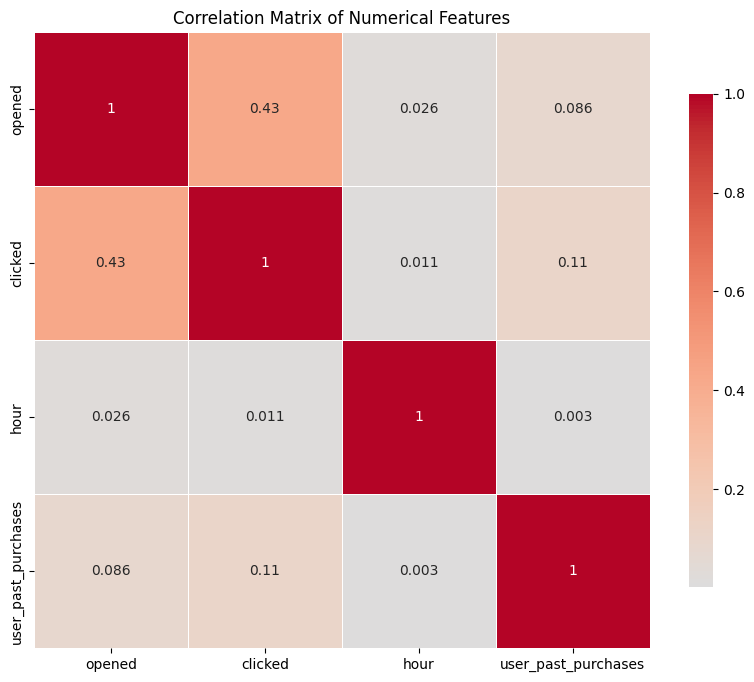

In [24]:
plt.figure(figsize=(10, 8))
correlation_matrix = new_df[num_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

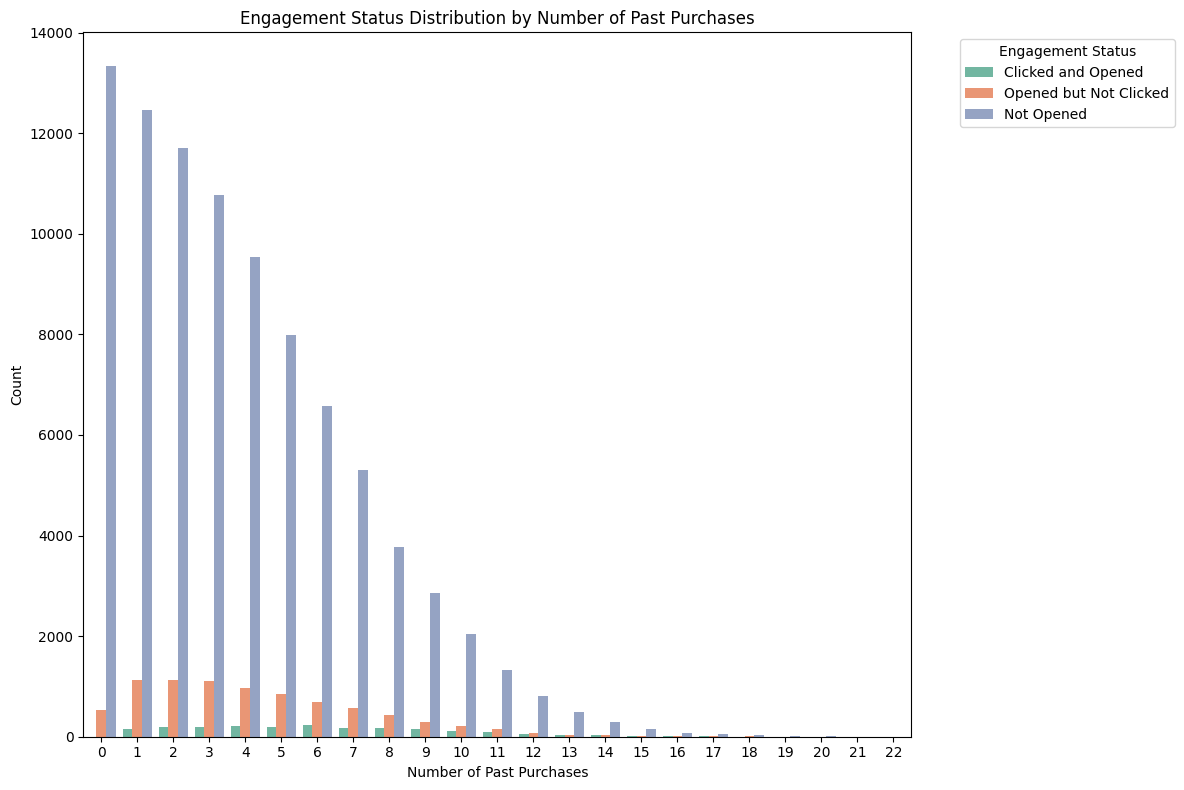

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(data=new_df, x='user_past_purchases', hue='engagement_status', palette='Set2')
plt.title('Engagement Status Distribution by Number of Past Purchases')
plt.xlabel('Number of Past Purchases')
plt.ylabel('Count')
plt.legend(title='Engagement Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


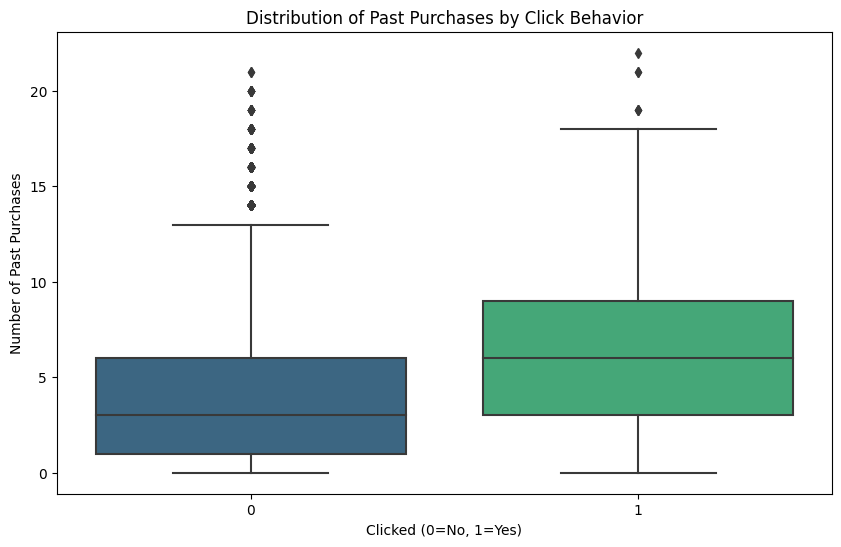

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df, x='clicked', y='user_past_purchases', palette='viridis')
plt.title('Distribution of Past Purchases by Click Behavior')
plt.xlabel('Clicked (0=No, 1=Yes)')
plt.ylabel('Number of Past Purchases')
plt.show()


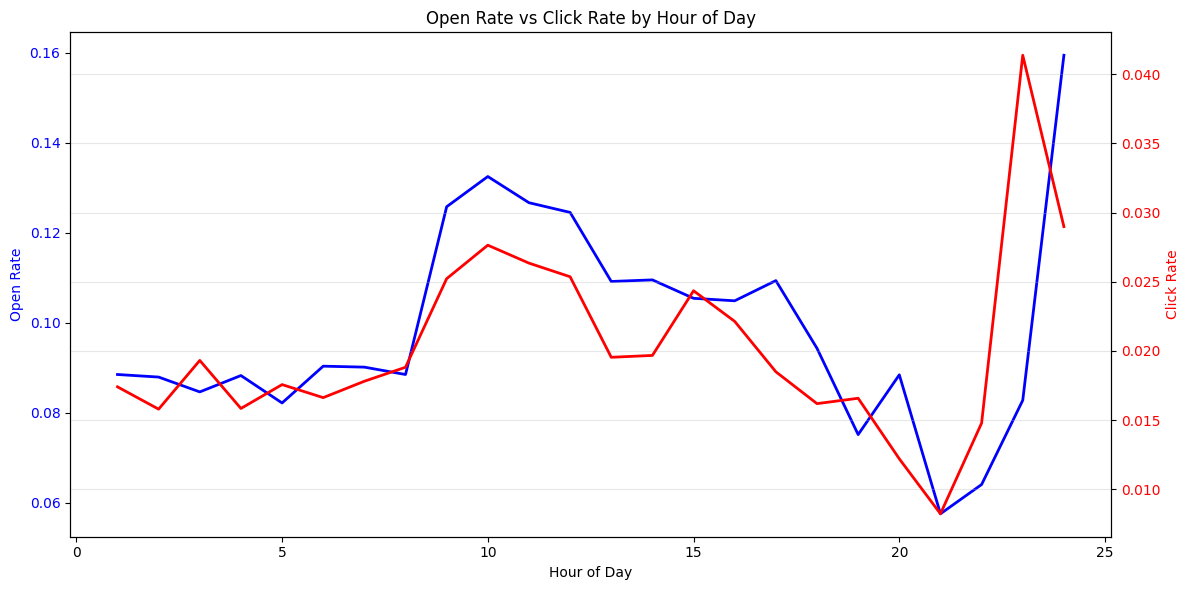

In [27]:
fig, ax1 = plt.subplots(figsize=(12, 6))
hourly_open_rate = new_df.groupby('hour')['opened'].mean()
hourly_click_rate = new_df.groupby('hour')['clicked'].mean()

ax1.plot(hourly_open_rate.index, hourly_open_rate.values, 'b-', label='Open Rate', linewidth=2)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Open Rate', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(hourly_click_rate.index, hourly_click_rate.values, 'r-', label='Click Rate', linewidth=2)
ax2.set_ylabel('Click Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Open Rate vs Click Rate by Hour of Day')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
def get_engagement_status2(row):
    if row['clicked'] == 1 and row['opened'] == 1:
        return "2"
    elif row['opened'] == 1 and row['clicked'] == 0:
        return "1"
    elif row['opened'] == 0 and row['clicked'] == 0:
        return "0"
    else:
       
        return "Anomaly"

new_df['engagement_status2'] = new_df.apply(get_engagement_status2, axis=1)

print(new_df['engagement_status2'].value_counts())


engagement_status2
0    89605
1     8276
2     2069
Name: count, dtype: int64


C:\Users\gaura\AppData\Local\Temp\ipykernel_19464\128607624.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['engagement_status2'] = new_df.apply(get_engagement_status2, axis=1)


In [29]:
correlation_columns = ['hour', 'user_past_purchases', 'engagement_status2']
correlation_matrix = new_df[correlation_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)
print()

Correlation Matrix:
                         hour  user_past_purchases  engagement_status2
hour                 1.000000             0.003038            0.024426
user_past_purchases  0.003038             1.000000            0.106843
engagement_status2   0.024426             0.106843            1.000000



Correlation with Engagement Status (sorted by absolute value):
user_past_purchases    0.106843
hour                   0.024426
Name: engagement_status2, dtype: float64



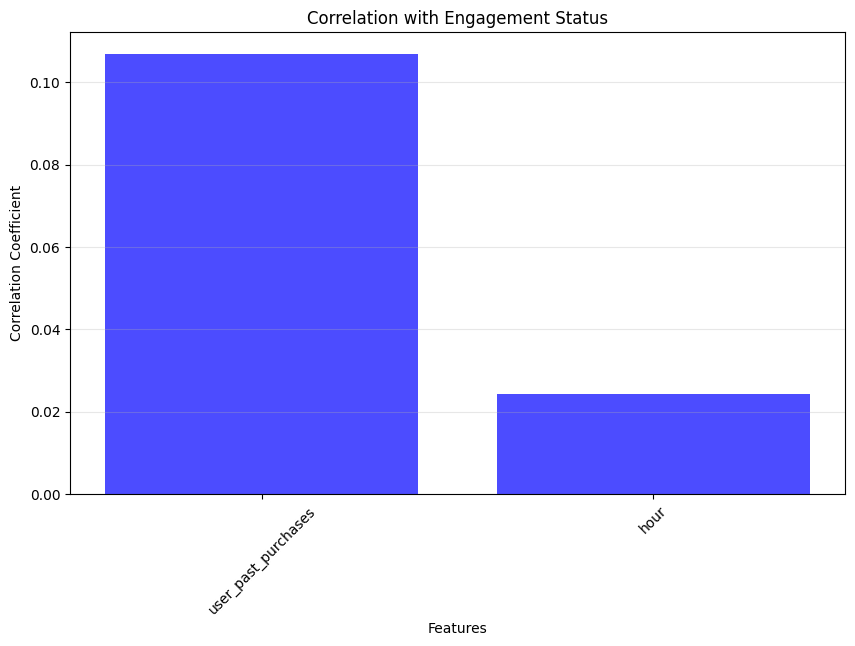

In [30]:
engagement_correlations = correlation_matrix['engagement_status2'].drop('engagement_status2').sort_values(key=abs, ascending=False)
print("Correlation with Engagement Status (sorted by absolute value):")
print(engagement_correlations)
print()

plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'blue' for x in engagement_correlations.values]
bars = plt.bar(engagement_correlations.index, engagement_correlations.values, color=colors, alpha=0.7)
plt.title('Correlation with Engagement Status')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

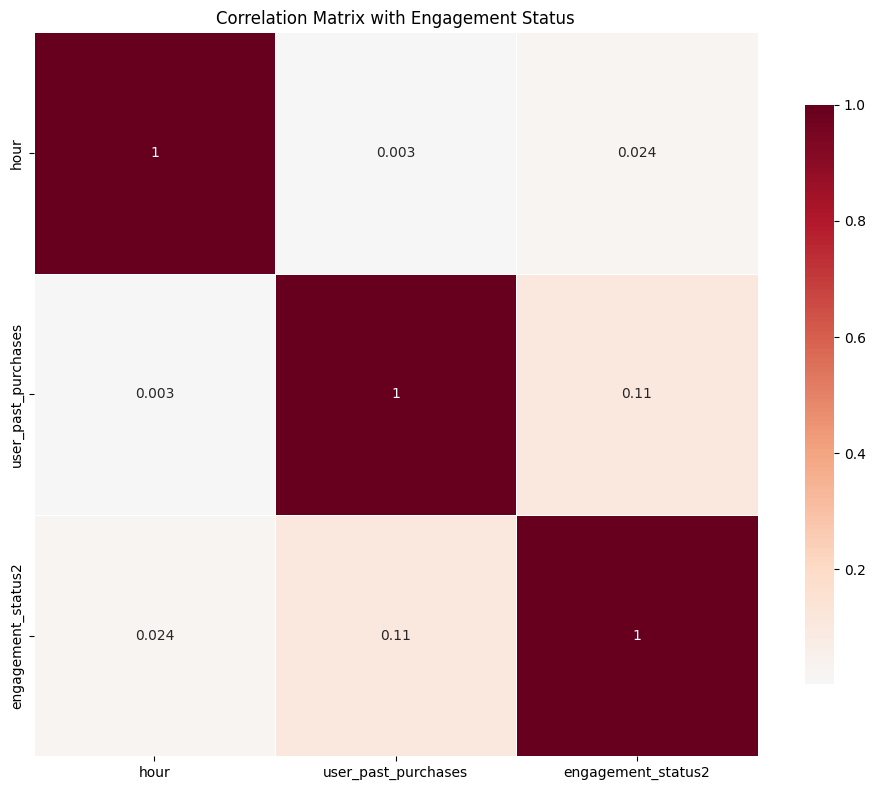

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix with Engagement Status')
plt.tight_layout()
plt.show()

In [32]:
from scipy.stats import chi2_contingency

# Calculate contingency table for user_country vs clicked
contingency_table_user_country = pd.crosstab(new_df['user_country'], new_df['engagement_status2'])
chi2_country, p_country, dof_country, expected_country = chi2_contingency(contingency_table_user_country)

print(f"User Country vs Clicked: Chi2 = {chi2_country}, p-value = {p_country}")


User Country vs Clicked: Chi2 = 1087.7303634088657, p-value = 9.416776570790791e-232


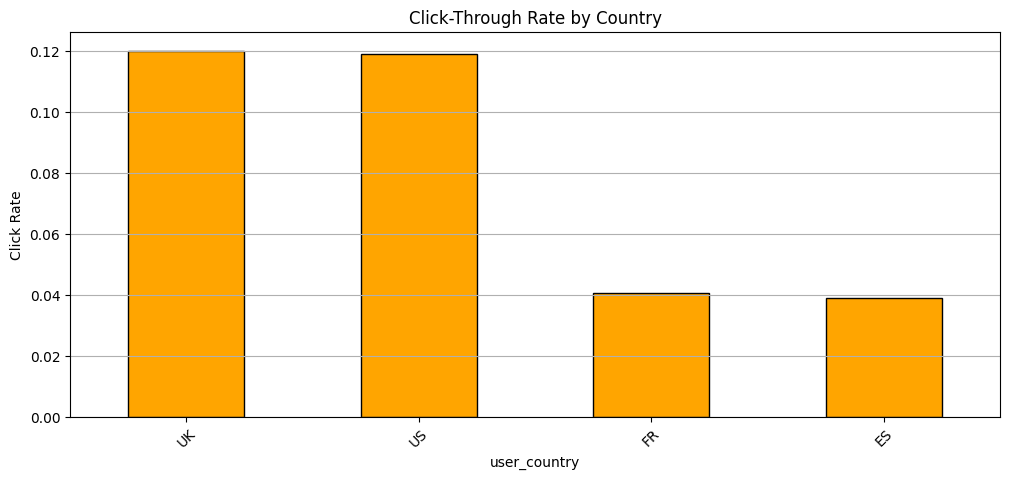

In [33]:
new_df.groupby('user_country')['opened'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,5), color='orange', edgecolor='black')
plt.title("Click-Through Rate by Country")
plt.ylabel("Click Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [34]:
# Calculate contingency table for email_text vs clicked
contingency_table_email_text = pd.crosstab(new_df['email_text'], new_df['opened'])
chi2_text, p_text, dof_text, expected_text = chi2_contingency(contingency_table_email_text)

print(f"Email Text vs Clicked: Chi2 = {chi2_text}, p-value = {p_text}")

Email Text vs Clicked: Chi2 = 163.80052942745016, p-value = 1.6723890503369952e-37


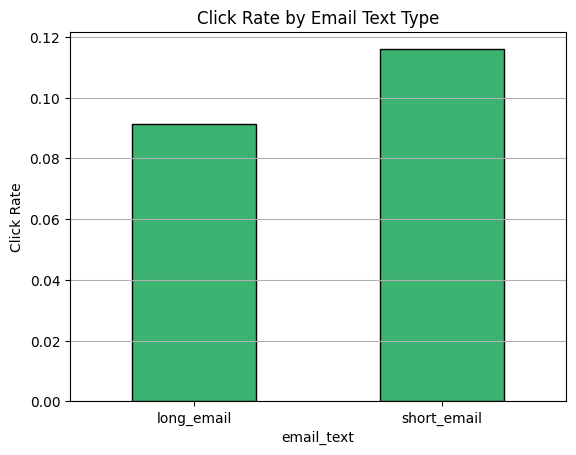

In [35]:
new_df.groupby('email_text')['opened'].mean().plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title("Click Rate by Email Text Type")
plt.ylabel("Click Rate")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [36]:
contingency_table_hour_day = pd.crosstab([new_df['hour'], new_df['weekday']], new_df['clicked'])
chi2, p, dof, expected = chi2_contingency(contingency_table_hour_day)
print(f"Chi² = {chi2:.2f}, p-value = {p:.4e}")

Chi² = 353.52, p-value = 1.8881e-15


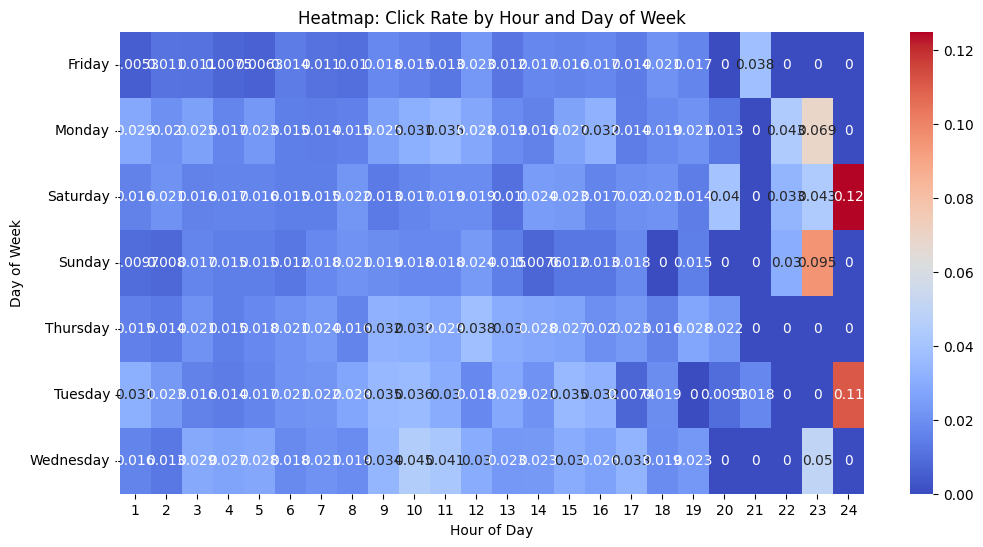

In [37]:
heatmap_data = new_df.pivot_table(index='weekday', columns='hour', values='clicked', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.title("Heatmap: Click Rate by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


In [38]:
new_df

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases,engagement_status,engagement_status2
0,284534,1,1,short_email,personalized,7,Monday,US,6,Clicked and Opened,2
1,609056,1,1,short_email,personalized,2,Thursday,US,6,Clicked and Opened,2
2,220820,1,1,short_email,personalized,8,Monday,UK,4,Clicked and Opened,2
3,905936,1,1,short_email,generic,14,Saturday,UK,3,Clicked and Opened,2
4,164034,1,1,long_email,personalized,2,Thursday,US,11,Clicked and Opened,2
...,...,...,...,...,...,...,...,...,...,...,...
99995,506337,0,0,short_email,generic,8,Wednesday,FR,2,Not Opened,0
99996,803504,0,0,short_email,personalized,4,Monday,US,5,Not Opened,0
99997,899722,0,0,long_email,personalized,7,Saturday,US,1,Not Opened,0
99998,449610,0,0,long_email,personalized,11,Saturday,UK,6,Not Opened,0


In [39]:
new_df.drop(columns=['email_id', 'engagement_status2','clicked','opened'], inplace=True)

C:\Users\gaura\AppData\Local\Temp\ipykernel_19464\4021946429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['email_id', 'engagement_status2','clicked','opened'], inplace=True)


In [40]:
new_df

,email_text,email_version,hour,weekday,user_country,user_past_purchases,engagement_status
0,short_email,personalized,7,Monday,US,6,Clicked and Opened
1,short_email,personalized,2,Thursday,US,6,Clicked and Opened
2,short_email,personalized,8,Monday,UK,4,Clicked and Opened
3,short_email,generic,14,Saturday,UK,3,Clicked and Opened
4,long_email,personalized,2,Thursday,US,11,Clicked and Opened
...,...,...,...,...,...,...,...
99995,short_email,generic,8,Wednesday,FR,2,Not Opened
99996,short_email,personalized,4,Monday,US,5,Not Opened
99997,long_email,personalized,7,Saturday,US,1,Not Opened
99998,long_email,personalized,11,Saturday,UK,6,Not Opened


In [41]:
new_df.to_csv('cleaned_data', index=False)

In [42]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [43]:
new_df

,email_text,email_version,hour,weekday,user_country,user_past_purchases,engagement_status
0,short_email,personalized,7,Monday,US,6,Clicked and Opened
1,short_email,personalized,2,Thursday,US,6,Clicked and Opened
2,short_email,personalized,8,Monday,UK,4,Clicked and Opened
3,short_email,generic,14,Saturday,UK,3,Clicked and Opened
4,long_email,personalized,2,Thursday,US,11,Clicked and Opened
...,...,...,...,...,...,...,...
99995,short_email,generic,8,Wednesday,FR,2,Not Opened
99996,short_email,personalized,4,Monday,US,5,Not Opened
99997,long_email,personalized,7,Saturday,US,1,Not Opened
99998,long_email,personalized,11,Saturday,UK,6,Not Opened


In [44]:
x = new_df[['email_text','email_version','user_country','user_past_purchases','hour','weekday']]
y = new_df['engagement_status']

In [45]:
# First encode the target variable
Labelencoder = LabelEncoder()
y_encoded = Labelencoder.fit_transform(y)



In [46]:
cat_cols = ['email_text', 'email_version', 'user_country', 'weekday']
num_cols = ['user_past_purchases', 'hour']

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_cols', OneHotEncoder(drop='first'), cat_cols),
        ('num_cols', StandardScaler(), num_cols)
    ]
)

In [48]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='multinomial', class_weight='balanced', solver='saga', max_iter=2000, random_state=42))
])

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [50]:
pipeline.fit(x_train, y_train)

c:\Users\gaura\anaconda3\envs\project\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_cols',
                                                  OneHotEncoder(drop='first'),
                                                  ['email_text',
                                                   'email_version',
                                                   'user_country', 'weekday']),
                                                 ('num_cols', StandardScaler(),
                                                  ['user_past_purchases',
                                                   'hour'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    multi_class='multinomial', random_state=42,
                                    solver='saga'))])

In [51]:
y_pred = pipeline.predict(x_test)

In [52]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=Labelencoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
                         precision    recall  f1-score   support

    Clicked and Opened       0.05      0.43      0.09       417
            Not Opened       0.94      0.52      0.67     17916
Opened but Not Clicked       0.11      0.43      0.18      1657

              accuracy                           0.51     19990
             macro avg       0.37      0.46      0.31     19990
          weighted avg       0.85      0.51      0.62     19990

Confusion Matrix:
 [[ 180   82  155]
 [3137 9341 5438]
 [ 400  543  714]]


In [53]:
Pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

Pipeline_rf.fit(x_train, y_train)
y_pred_rf = Pipeline_rf.predict(x_test)

print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf, target_names=Labelencoder.classes_))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))

Classification Report (Random Forest):
                         precision    recall  f1-score   support

    Clicked and Opened       0.03      0.15      0.06       417
            Not Opened       0.91      0.72      0.81     17916
Opened but Not Clicked       0.10      0.24      0.14      1657

              accuracy                           0.67     19990
             macro avg       0.35      0.37      0.33     19990
          weighted avg       0.82      0.67      0.74     19990

Confusion Matrix (Random Forest):
 [[   64   253   100]
 [ 1601 12981  3334]
 [  220  1047   390]]


In [54]:
#grid search cv param 

In [55]:
# to select best features from th dataset rf.__feature_importances__ 

In [56]:
Pipeline_rf_with_gcv = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=50,bootstrap=True,max_depth=None,min_samples_leaf=1,min_samples_split=2 ,class_weight='balanced'))
])

Pipeline_rf.fit(x_train, y_train)
y_pred_rf_tuned = Pipeline_rf.predict(x_test)

print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf, target_names=Labelencoder.classes_))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))

Classification Report (Random Forest):
                         precision    recall  f1-score   support

    Clicked and Opened       0.03      0.15      0.06       417
            Not Opened       0.91      0.72      0.81     17916
Opened but Not Clicked       0.10      0.24      0.14      1657

              accuracy                           0.67     19990
             macro avg       0.35      0.37      0.33     19990
          weighted avg       0.82      0.67      0.74     19990

Confusion Matrix (Random Forest):
 [[   64   253   100]
 [ 1601 12981  3334]
 [  220  1047   390]]


In [57]:
# Import ensemble methods
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Create base models for ensemble
base_models = {
    'logistic': LogisticRegression(multi_class='multinomial', class_weight='balanced', 
                                 solver='saga', max_iter=2000, random_state=42),
    'random_forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'xgboost': xgb.XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'gradient_boost': GradientBoostingClassifier(random_state=42),
    'svm': SVC(probability=True, random_state=42, class_weight='balanced'),
    'naive_bayes': GaussianNB(),
    'knn': KNeighborsClassifier(n_neighbors=5)
}

# Create pipelines for each base model
pipelines = {}
for name, model in base_models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

print("Base models created successfully!")

Base models created successfully!


In [58]:
# 1. Voting Classifier (Hard and Soft Voting)
voting_classifiers = [
    ('logistic', pipelines['logistic']),
    ('random_forest', pipelines['random_forest']),
    ('xgboost', pipelines['xgboost'])
]

# Hard Voting
hard_voting_clf = VotingClassifier(
    estimators=voting_classifiers,
    voting='hard'
)

# Soft Voting
soft_voting_clf = VotingClassifier(
    estimators=voting_classifiers,
    voting='soft'
)

print("Training Hard Voting Classifier...")
hard_voting_clf.fit(x_train, y_train)
y_pred_hard_voting = hard_voting_clf.predict(x_test)

print("Training Soft Voting Classifier...")
soft_voting_clf.fit(x_train, y_train)
y_pred_soft_voting = soft_voting_clf.predict(x_test)

print("\n=== HARD VOTING CLASSIFIER RESULTS ===")
print("Accuracy:", accuracy_score(y_test, y_pred_hard_voting))
print("Classification Report:\n", classification_report(y_test, y_pred_hard_voting, target_names=Labelencoder.classes_))

print("\n=== SOFT VOTING CLASSIFIER RESULTS ===")
print("Accuracy:", accuracy_score(y_test, y_pred_soft_voting))
print("Classification Report:\n", classification_report(y_test, y_pred_soft_voting, target_names=Labelencoder.classes_))

Training Hard Voting Classifier...
Training Soft Voting Classifier...

=== HARD VOTING CLASSIFIER RESULTS ===
Accuracy: 0.7427213606803401
Classification Report:
                         precision    recall  f1-score   support

    Clicked and Opened       0.04      0.23      0.07       417
            Not Opened       0.91      0.81      0.86     17916
Opened but Not Clicked       0.12      0.13      0.13      1657

              accuracy                           0.74     19990
             macro avg       0.36      0.39      0.35     19990
          weighted avg       0.83      0.74      0.78     19990


=== SOFT VOTING CLASSIFIER RESULTS ===
Accuracy: 0.8722361180590296
Classification Report:
                         precision    recall  f1-score   support

    Clicked and Opened       0.10      0.05      0.07       417
            Not Opened       0.90      0.97      0.93     17916
Opened but Not Clicked       0.15      0.05      0.07      1657

              accuracy             

In [59]:
# 2. Bagging Classifier
bagging_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(
        base_estimator=RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced'),
        n_estimators=10,
        random_state=42
    ))
])

print("Training Bagging Classifier...")
bagging_clf.fit(x_train, y_train)
y_pred_bagging = bagging_clf.predict(x_test)

print("\n=== BAGGING CLASSIFIER RESULTS ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Classification Report:\n", classification_report(y_test, y_pred_bagging, target_names=Labelencoder.classes_))

Training Bagging Classifier...

=== BAGGING CLASSIFIER RESULTS ===
Accuracy: 0.7946473236618309
Classification Report:
                         precision    recall  f1-score   support

    Clicked and Opened       0.05      0.07      0.06       417
            Not Opened       0.90      0.87      0.89     17916
Opened but Not Clicked       0.12      0.15      0.13      1657

              accuracy                           0.79     19990
             macro avg       0.36      0.36      0.36     19990
          weighted avg       0.82      0.79      0.81     19990



In [60]:
# 3. AdaBoost Classifier
adaboost_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(
        n_estimators=100,
        learning_rate=1.0,
        random_state=42
    ))
])

print("Training AdaBoost Classifier...")
adaboost_clf.fit(x_train, y_train)
y_pred_adaboost = adaboost_clf.predict(x_test)

print("\n=== ADABOOST CLASSIFIER RESULTS ===")
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Classification Report:\n", classification_report(y_test, y_pred_adaboost, target_names=Labelencoder.classes_))

Training AdaBoost Classifier...

=== ADABOOST CLASSIFIER RESULTS ===
Accuracy: 0.896248124062031
Classification Report:
                         precision    recall  f1-score   support

    Clicked and Opened       0.00      0.00      0.00       417
            Not Opened       0.90      1.00      0.95     17916
Opened but Not Clicked       0.00      0.00      0.00      1657

              accuracy                           0.90     19990
             macro avg       0.30      0.33      0.32     19990
          weighted avg       0.80      0.90      0.85     19990



In [61]:
# 4. Stacking Classifier
# Base models for stacking (without preprocessing as it will be done in the pipeline)
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    ('lr', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, random_state=42, class_weight='balanced')),
    ('xgb', xgb.XGBClassifier(random_state=42, eval_metric='mlogloss',class_weight='balanced')),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Meta-learner
meta_learner = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
stacking_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', StackingClassifier(
        estimators=base_learners,
        final_estimator=meta_learner,
        cv=5,
        n_jobs=-1
    ))
])

print("Training Stacking Classifier...")
stacking_clf.fit(x_train, y_train)
y_pred_stacking = stacking_clf.predict(x_test)

print("\n=== STACKING CLASSIFIER RESULTS ===")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Classification Report:\n", classification_report(y_test, y_pred_stacking, target_names=Labelencoder.classes_))

Training Stacking Classifier...

=== STACKING CLASSIFIER RESULTS ===
Accuracy: 0.8959979989994997
Classification Report:
                         precision    recall  f1-score   support

    Clicked and Opened       0.00      0.00      0.00       417
            Not Opened       0.90      1.00      0.95     17916
Opened but Not Clicked       0.27      0.00      0.00      1657

              accuracy                           0.90     19990
             macro avg       0.39      0.33      0.32     19990
          weighted avg       0.83      0.90      0.85     19990



=== MODEL COMPARISON (ACCURACY) ===
Stacking: 0.8960
Soft Voting: 0.8722
Bagging: 0.7946
Hard Voting: 0.7427
Random Forest: 0.6721
Tuned Random Forest: 0.6721
Logistic Regression: 0.5120


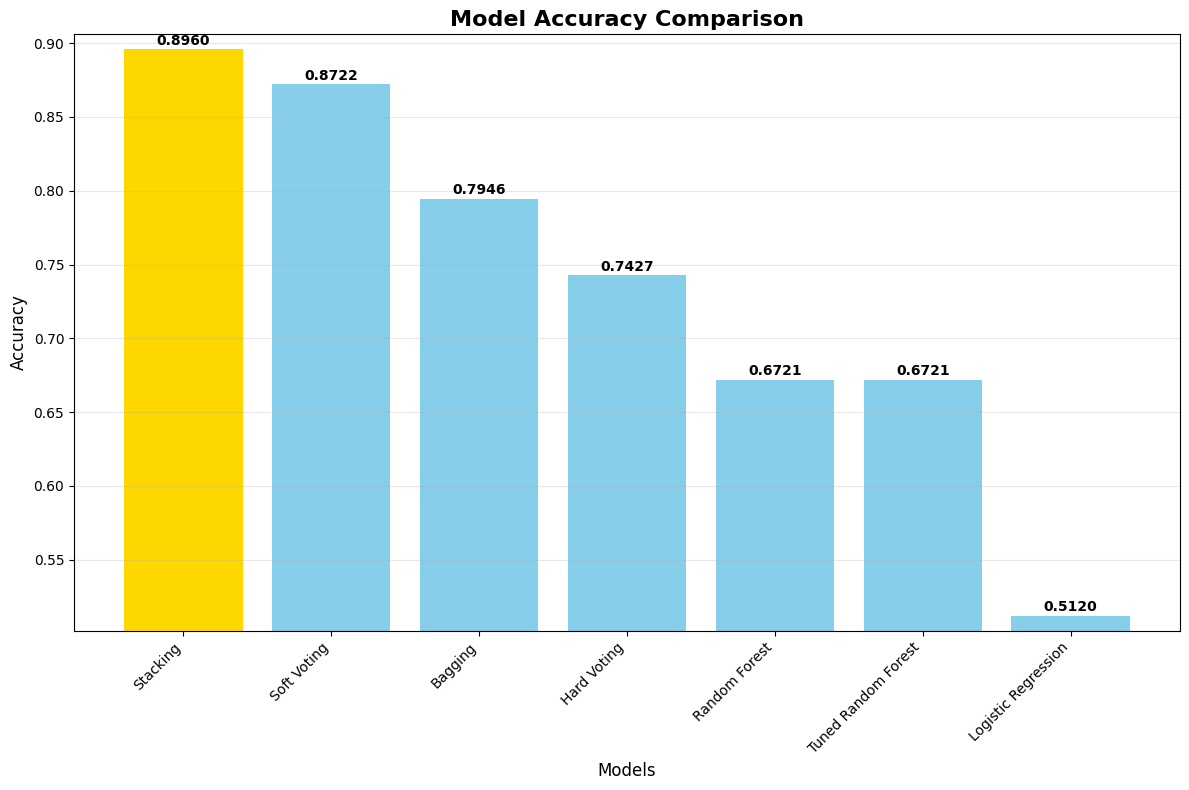


Best performing model: Stacking with accuracy: 0.8960


In [62]:
# 5. Compare All Models Performance
models_results = {
    'Logistic Regression': accuracy_score(y_test, y_pred),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Tuned Random Forest': accuracy_score(y_test, y_pred_rf_tuned),
    'Hard Voting': accuracy_score(y_test, y_pred_hard_voting),
    'Soft Voting': accuracy_score(y_test, y_pred_soft_voting),
    'Bagging': accuracy_score(y_test, y_pred_bagging),
    'Stacking': accuracy_score(y_test, y_pred_stacking)
}

# Sort results by accuracy
sorted_results = dict(sorted(models_results.items(), key=lambda x: x[1], reverse=True))

print("=== MODEL COMPARISON (ACCURACY) ===")
for model, accuracy in sorted_results.items():
    print(f"{model}: {accuracy:.4f}")

# Visualize results
plt.figure(figsize=(12, 8))
models = list(sorted_results.keys())
accuracies = list(sorted_results.values())

bars = plt.bar(models, accuracies, color=['gold' if i == 0 else 'skyblue' for i in range(len(models))])
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(min(accuracies) - 0.01, max(accuracies) + 0.01)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

best_model = list(sorted_results.keys())[0]
print(f"\nBest performing model: {best_model} with accuracy: {list(sorted_results.values())[0]:.4f}")


In [63]:
print("Classification Report:\n", classification_report(y_test, y_pred_stacking, target_names=Labelencoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacking))

Classification Report:
                         precision    recall  f1-score   support

    Clicked and Opened       0.00      0.00      0.00       417
            Not Opened       0.90      1.00      0.95     17916
Opened but Not Clicked       0.27      0.00      0.00      1657

              accuracy                           0.90     19990
             macro avg       0.39      0.33      0.32     19990
          weighted avg       0.83      0.90      0.85     19990

Confusion Matrix:
 [[    0   417     0]
 [    0 17908     8]
 [    0  1654     3]]


In [64]:
second_best_model = list(sorted_results.keys())[1]
print(f"Second best performing model: {second_best_model} with accuracy: {list(sorted_results.values())[1]:.4f}")

Second best performing model: Soft Voting with accuracy: 0.8722


In [65]:
print("Classification Report for softmax:\n", classification_report(y_test, y_pred_soft_voting, target_names=Labelencoder.classes_))
print("Confusion Matrix softmax:\n", confusion_matrix(y_test, y_pred_soft_voting))

Classification Report for softmax:
                         precision    recall  f1-score   support

    Clicked and Opened       0.10      0.05      0.07       417
            Not Opened       0.90      0.97      0.93     17916
Opened but Not Clicked       0.15      0.05      0.07      1657

              accuracy                           0.87     19990
             macro avg       0.38      0.35      0.36     19990
          weighted avg       0.82      0.87      0.84     19990

Confusion Matrix softmax:
 [[   20   375    22]
 [  146 17338   432]
 [   29  1550    78]]


In [66]:
import joblib

# Save the soft_voting_clf model to a file
joblib.dump(soft_voting_clf, 'soft_voting_clf.pkl')

print("Model dumped successfully!")

Model dumped successfully!


In [67]:
new_df

,email_text,email_version,hour,weekday,user_country,user_past_purchases,engagement_status
0,short_email,personalized,7,Monday,US,6,Clicked and Opened
1,short_email,personalized,2,Thursday,US,6,Clicked and Opened
2,short_email,personalized,8,Monday,UK,4,Clicked and Opened
3,short_email,generic,14,Saturday,UK,3,Clicked and Opened
4,long_email,personalized,2,Thursday,US,11,Clicked and Opened
...,...,...,...,...,...,...,...
99995,short_email,generic,8,Wednesday,FR,2,Not Opened
99996,short_email,personalized,4,Monday,US,5,Not Opened
99997,long_email,personalized,7,Saturday,US,1,Not Opened
99998,long_email,personalized,11,Saturday,UK,6,Not Opened


In [68]:
# Calculate metrics using predictive analysis
def calculate_optimized_metrics(new_df, model):
    # Get base metrics
    base_metrics = {
        'open_rate': (df['opened'].mean() * 100) if 'opened' in df.columns else None,
        'click_rate': (df['clicked'].mean() * 100) if 'clicked' in df.columns else None,
        'engagement_score': (((df['clicked'] * 2 + df['opened']) / 3 * 10).mean()) if 'opened' in df.columns and 'clicked' in df.columns else None
    }
    
    # Find optimal hours using model predictions
    hour_scores = []
    for hour in range(24):
        test_data = new_df.copy()
        test_data['hour'] = hour
        predictions = model.predict_proba(test_data[['hour', 'weekday', 'user_country', 'email_text', 'email_version', 'user_past_purchases']])
        hour_scores.append((hour, predictions[:,2].mean()))  # Index 2 for 'Clicked and Opened'
    
    best_hours = sorted(hour_scores, key=lambda x: x[1], reverse=True)[:3]
    
    # Find optimal days
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_scores = []
    for day in days:
        test_data = new_df.copy()
        test_data['weekday'] = day
        predictions = model.predict_proba(test_data[['hour', 'weekday', 'user_country', 'email_text', 'email_version', 'user_past_purchases']])
        day_scores.append((day, predictions[:,2].mean()))
    
    best_days = sorted(day_scores, key=lambda x: x[1], reverse=True)[:3]
    
    # Find optimal countries
    countries = new_df['user_country'].unique()
    country_scores = []
    for country in countries:
        test_data = new_df.copy()
        test_data['user_country'] = country
        predictions = soft_voting_clf.predict_proba(test_data[['hour', 'weekday', 'user_country', 'email_text', 'email_version', 'user_past_purchases']])
        country_scores.append((country, predictions[:,2].mean()))
    
    best_countries = sorted(country_scores, key=lambda x: x[1], reverse=True)[:3]
    
    metrics = {
        **base_metrics,
        'best_hours': [h[0] for h in best_hours],
        'best_days': [d[0] for d in best_days],
        'top_countries': [c[0] for c in best_countries],
        'hour_scores': dict(hour_scores),
        'day_scores': dict(day_scores),
        'country_scores': dict(country_scores),
        'best_engagement_hour': best_hours[0][0] if best_hours else None,
        'best_engagement_day': best_days[0][0] if best_days else None,
        'best_engagement_country': best_countries[0][0] if best_countries else None
    }
    
    return metrics

# Calculate optimized metrics using the trained model
optimized_metrics = calculate_optimized_metrics(new_df, soft_voting_clf)

# Save updated metrics
joblib.dump(optimized_metrics, 'email_engagement_metrics.joblib')

['email_engagement_metrics.joblib']

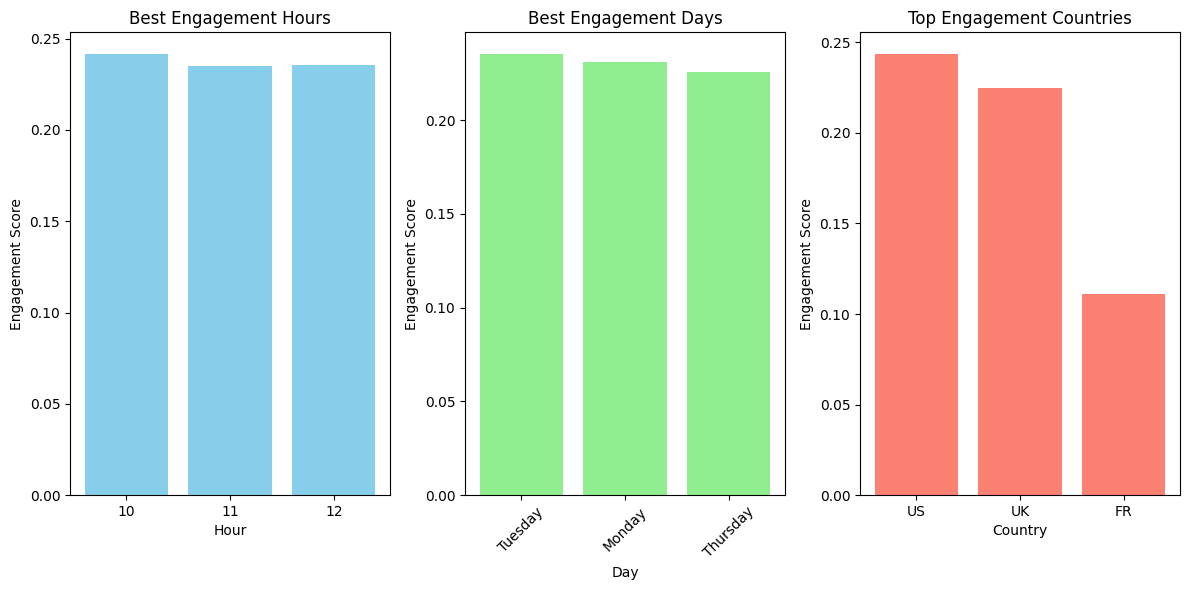

In [69]:
# Visualize engagement metrics
plt.figure(figsize=(12, 6))

# Best Hours
plt.subplot(1, 3, 1)
plt.bar(optimized_metrics['best_hours'], [optimized_metrics['hour_scores'][hour] for hour in optimized_metrics['best_hours']], color='skyblue')
plt.title('Best Engagement Hours')
plt.xlabel('Hour')
plt.ylabel('Engagement Score')
plt.xticks(optimized_metrics['best_hours'])

# Best Days
plt.subplot(1, 3, 2)
plt.bar(optimized_metrics['best_days'], [optimized_metrics['day_scores'][day] for day in optimized_metrics['best_days']], color='lightgreen')
plt.title('Best Engagement Days')
plt.xlabel('Day')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)

# Top Countries
plt.subplot(1, 3, 3)
plt.bar(optimized_metrics['top_countries'], [optimized_metrics['country_scores'][country] for country in optimized_metrics['top_countries']], color='salmon')
plt.title('Top Engagement Countries')
plt.xlabel('Country')
plt.ylabel('Engagement Score')

plt.tight_layout()
plt.show()

In [70]:
soft_voting_clf.predict(new_df[['hour', 'weekday', 'user_country', 'email_text', 'email_version', 'user_past_purchases']]).sum()

101592

In [71]:
# Create a DataFrame for the input values
input_data = pd.DataFrame({
    'email_text': ['short_email'],
    'email_version': ['generic'],
    'hour': [10],
    'weekday': ['Monday'],
    'user_country': ['UK'] [0],
    'user_past_purchases' : [8]  # Replace with the actual number of past purchases
})

# Make prediction
predicted_class = soft_voting_clf.predict(input_data)
predicted_probabilities = soft_voting_clf.predict_proba(input_data)

print(f"Predicted Class: {Labelencoder.inverse_transform(predicted_class)[0]}")
print(f"Predicted Probabilities: {predicted_probabilities[0]}")


Predicted Class: Not Opened
Predicted Probabilities: [0.1599338  0.6402825  0.19978371]
